# Activites List
- It is highly encouraged to work in a group of two students for the lab of this case study.
- <b>Important: for Activity 1, Activity 2 and  Activity 3 , please use the files [file1.csv](./Data/file1.csv), [file2.csv](./Data/file2.csv) and [file3.csv](./Data/file3.csv) from the [Data](./Data) folder.</b>

### Activity 1 (Monday)

- Aggregate data into one Data Frame using Pandas. Pay attention that files may have different names for the same column. therefore, make sure that you unify the columns names before concating them. 
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.
- clean the number of open complaints and extract the middle number which is changing between records. pay attention that the number of open complaints is a categorical feature.
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates

### Activity 2 (Tuesday)
- Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values)
Hint: numpy.nan is considered of float64 data type.
- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- (Optional) Standardizing the data – Use string functions to standardize the text data (lower case)

<b>Important: for Activity 3 and Activity 4 , please use the [file Data_Marketing_Customer_Analysis_Round3.csv](./Data/Data_Marketing_Customer_Analysis_Round3.csv) from the [Data](./Data) folder.</b>

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from itertools import compress

pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

### Activity 3 (Wednesday)

- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
- Optional: Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [20]:
df = pd.read_csv(r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\IH_RH_DA_FT_AUG_2022\Class_Materials\Case_Studies\Customer_Analysis_Case_Study\Data\Data_Marketing_Customer_Analysis_Round3.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [22]:
def get_numeric_columns(df):
    """
    filter out all numerical columns;
    return list of these columns;
    """
    numerical_strings_bool = [is_numeric_dtype(df[col]) for col in df.columns]
    numerical_strings_true = list(compress(list(df.columns), numerical_strings_bool))
    
    return numerical_strings_true

In [23]:
def get_string_columns_s(df):
    """
    filter out all object (string) columns;
    return list of these columns;
    """
    #object_strings_bool = [is_string_dtype(df[col]) for col in df.columns]
    #object_strings_true = list(compress(list(ca_df.columns), object_strings_bool))
    object_strings_true = list(set(list(df.columns))-set(get_numeric_columns(df)))
    
    return object_strings_true

In [24]:
#df_numerical = df[get_numeric_columns(df)]
df_numerical = df.select_dtypes(exclude=['object'])
#df_categorical = df[get_string_columns_s(df)]
df_categorical = df.select_dtypes(include=['object'])

In [25]:
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


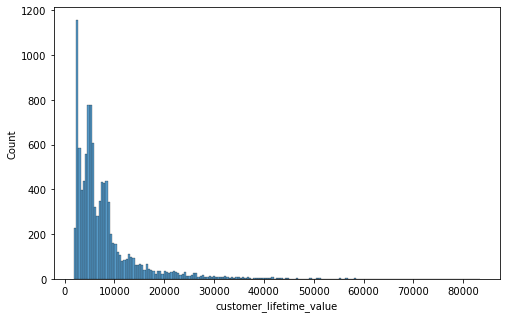

In [34]:
plt.figure(figsize = (8,5))
p = sns.histplot(data=df_numerical["customer_lifetime_value"])


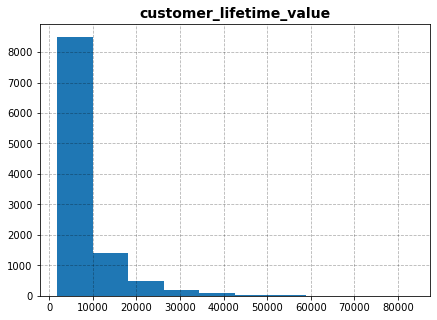

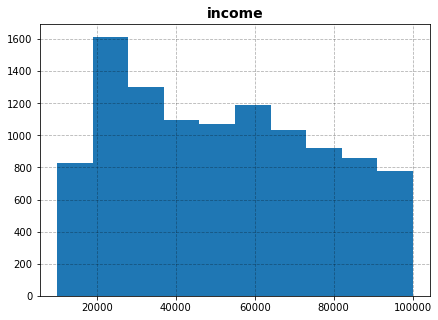

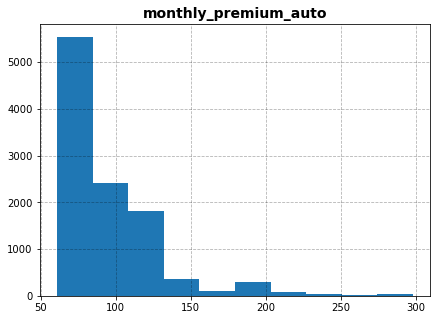

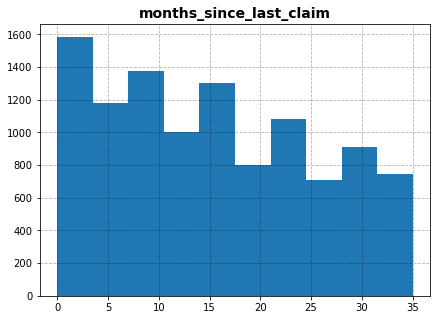

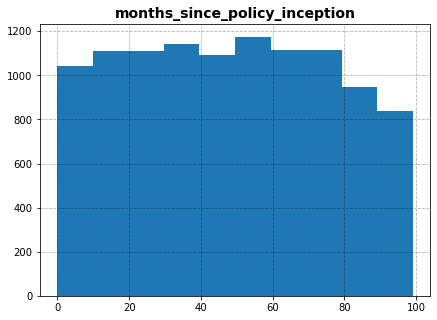

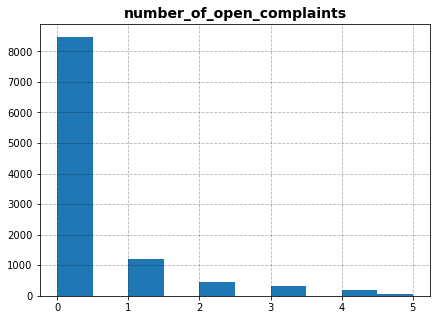

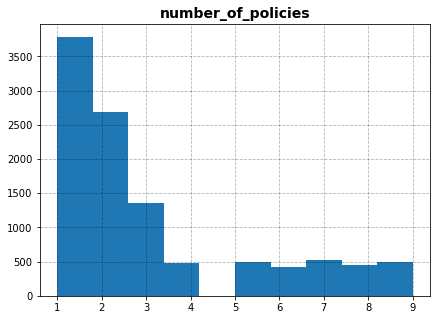

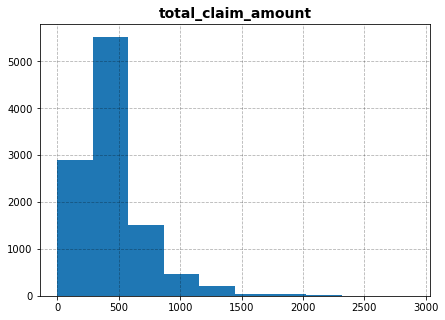

In [68]:
for col in df_numerical:
    fig, ax = plt.subplots(figsize=(7,5))
    ax.grid(alpha=0.3, color="k", ls="--")
    plt.title(col, size=14, weight="bold")
    
    ax = df[col].hist()
    
    plt.show()

### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [ ]:
def remove_outliers(df,columns,n_std):
    """
    function for removing outliers from given df;
    select in which column outliers are to be removed;
    specify "outlier condition" by supplying number of standard deviations;
    """
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        std = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*std))]
        df.reset_index(drop=True, inplace=True)
        
    return df